In [1]:
#Import my libaries 

import pandas as pd
import seaborn as sns
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import re
import missingno as msno 
import sklearn

from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

In [2]:
# List of the file names
file_names = ['ppr-2011-dublin.csv', 
              'ppr-2012-dublin.csv', 
              'ppr-2013-dublin.csv', 
              'ppr-2014-dublin.csv', 
              'ppr-2015-dublin.csv', 
              'ppr-2016-dublin.csv', 
              'ppr-2017-dublin.csv', 
              'ppr-2018-dublin.csv', 
              'ppr-2019-dublin.csv', 
              'ppr-2020.csv']

In [3]:
# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

In [4]:
# Loop through the list of file names and append the data to the combined_data DataFrame
for file_name in file_names:
    data = pd.read_csv(file_name)
    combined_data = pd.concat([combined_data, data], axis=0)

In [5]:
# Save the combined data to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)

In [6]:
data = pd.read_csv('combined_data.csv')
data.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (Eur),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2011,"251 Clontarf Road, Clontarf",Dublin 3,Dublin,"108,532.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN
1,04/01/2011,"22 St. Patrick's Park, Clondalkin",NaN,Dublin,"360,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,04/01/2011,"46 Longmeadows, Islandbridge",Dublin 8,Dublin,"254,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2011,"60 WOODSIDE, RATHFARNHAM, DUBLIN 14",Dublin 14,Dublin,"445,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2011,"9 Shandon Crescent, Phibsboro, Dublin 7",NaN,Dublin,"220,000.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166342 entries, 0 to 166341
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  166342 non-null  object
 1   Address                    166342 non-null  object
 2   Postal Code                77825 non-null   object
 3   County                     166342 non-null  object
 4   Price (Eur)                166342 non-null  object
 5   Not Full Market Price      166342 non-null  object
 6   VAT Exclusive              166342 non-null  object
 7   Description of Property    166342 non-null  object
 8   Property Size Description  17515 non-null   object
dtypes: object(9)
memory usage: 11.4+ MB


In [8]:
data.shape

(166342, 9)

In [9]:
data.describe()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (Eur),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
count,166342,166342,77825,166342,166342,166342,166342,166342,17515
unique,2919,160505,31,26,14918,2,2,4,5
top,18/12/2020,"WALLSLOUGH VILLAGE, WALLSLOUGH",Dublin 15,Dublin,"250,000.00",No,No,Second-Hand Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
freq,847,7,9672,131732,1809,158478,137254,136763,13467


In [10]:
(data.isnull().sum()/(len(data)))*100

Date of Sale (dd/mm/yyyy)     0.000000
Address                       0.000000
Postal Code                  53.213861
County                        0.000000
Price (Eur)                   0.000000
Not Full Market Price         0.000000
VAT Exclusive                 0.000000
Description of Property       0.000000
Property Size Description    89.470489
dtype: float64

In [11]:
data['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment', 'Teach/¡ras·n CÛnaithe Ath·imhe',
       'Teach/?ras?n C?naithe Nua'], dtype=object)

In [12]:
data['Property Size Description'].unique()

array([nan,
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'less than 38 sq metres', 'greater than 125 sq metres',
       'n?os l? n? 38 m?adar cearnach',
       'greater than or equal to 125 sq metres'], dtype=object)

In [13]:
data['Postal Code'].unique()

array(['Dublin 3', nan, 'Dublin 8', 'Dublin 14', 'Dublin 1', 'Dublin 7',
       'Dublin 4', 'Dublin 12', 'Dublin 5', 'Dublin 2', 'Dublin 16',
       'Dublin 9', 'Dublin 20', 'Dublin 15', 'Dublin 6', 'Dublin 22',
       'Dublin 6w', 'Dublin 17', 'Dublin 13', 'Dublin 11', 'Dublin 24',
       'Dublin 18', 'Dublin 10', 'Baile ¡tha Cliath 14',
       'Baile ?tha Cliath 17', 'Baile ¡tha Cliath 5', 'NÌ Bhaineann',
       'Baile ¡tha Cliath 3', 'Baile ¡tha Cliath 15',
       'Baile ¡tha Cliath 4', 'Baile ¡tha Cliath 9',
       'Baile ¡tha Cliath 18'], dtype=object)

In [14]:
data['County'].unique()

array(['Dublin', 'Tipperary', 'Kerry', 'Meath', 'Carlow', 'Kildare',
       'Waterford', 'Limerick', 'Louth', 'Roscommon', 'Cork', 'Clare',
       'Offaly', 'Laois', 'Galway', 'Leitrim', 'Donegal', 'Kilkenny',
       'Wexford', 'Longford', 'Cavan', 'Sligo', 'Wicklow', 'Mayo',
       'Westmeath', 'Monaghan'], dtype=object)

In [15]:
data.duplicated().sum()

199

In [16]:
# 1. Delete rows where County is not Dublin
data = data[~(data['County'] != 'Dublin')]

In [17]:
# 2. Remove rows with blank Postal Code
data = data.dropna(subset=['Postal Code'])

In [18]:
# 3. Drop Property Size Description column
data = data.drop('Property Size Description', axis=1)

In [19]:
# 4. Split Address column by comma and keep only first two columns
data[['Address Line 1', 'Address Line 2']] = data['Address'].str.split(',', 1, expand=True)
data = data.drop('Address', axis=1)

In [20]:
# 5. Drop rows containing "Teach/¡ras·n CÛnaithe Ath·imhe" and "Teach/?ras?n C?naithe Nua"
data = data[~data['Description of Property'].isin(["Teach/¡ras·n CÛnaithe Ath·imhe", "Teach/?ras?n C?naithe Nua"])]

In [21]:
# 6. Replace commas with empty strings in the 'Price (Eur)' column
data['Price (Eur)'] = data['Price (Eur)'].str.replace(',', '')

In [22]:
# 7. Convert the 'Price (Eur)' column to a float dtype
data['Price (Eur)'] = data['Price (Eur)'].astype(float)

In [23]:
# 8. Convert the 'Date of Sale (dd/mm/yyyy)' column to a date dtype
data['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(data['Date of Sale (dd/mm/yyyy)'])

In [24]:
# 9. Drop rows containing "Yes" for "Not Full Market Price"
data = data[~data['Not Full Market Price'].isin(["Yes"])]

In [25]:
# 10. Split the 'Postal Code' column and keep only the number element
data['Dub_Code'] = data['Postal Code'].str.split().str[1]

In [27]:
# 11. Drop rows containing "6w"
data = data[~data['Dub_Code'].isin(["6w"])]

In [28]:
data[data['Price (Eur)'].isna()]

,Date of Sale (dd/mm/yyyy),Postal Code,County,Price (Eur),Not Full Market Price,VAT Exclusive,Description of Property,Address Line 1,Address Line 2,Dub_Code,Year


In [29]:
# 10. Remove values not between 100000 & 2000000, removes site & commerical sales - Abitrary decision based on personal experience
data.drop(data[(data['Price (Eur)'] < 100000.00) | (data['Price (Eur)'] > 1000000.00)].index, inplace=True)

In [30]:
# Save the modified DataFrame to a new CSV file
data.to_csv('dublin_data.csv', index=False)

In [31]:
df = pd.read_csv('dublin_data.csv')
df.head()

,Date of Sale (dd/mm/yyyy),Postal Code,County,Price (Eur),Not Full Market Price,VAT Exclusive,Description of Property,Address Line 1,Address Line 2,Dub_Code,Year
0,2011-04-01,Dublin 8,Dublin,254000.0,No,No,Second-Hand Dwelling house /Apartment,46 Longmeadows,Islandbridge,8,2011
1,2011-04-01,Dublin 14,Dublin,445000.0,No,No,Second-Hand Dwelling house /Apartment,60 WOODSIDE,"RATHFARNHAM, DUBLIN 14",14,2011
2,2011-04-01,Dublin 1,Dublin,290500.0,No,No,Second-Hand Dwelling house /Apartment,Apartment 24 Baltrasna House,"Spencer Dock, North Wall Quay",1,2011
3,2011-05-01,Dublin 7,Dublin,290000.0,No,No,Second-Hand Dwelling house /Apartment,13 Linenhall Terrace,Broadstone,7,2011
4,2011-05-01,Dublin 4,Dublin,190000.0,No,No,Second-Hand Dwelling house /Apartment,2 Pembroke Cottages,"Ringsend, Dublin 4",4,2011


In [32]:
df['Postal Code'].unique()

array(['Dublin 8', 'Dublin 14', 'Dublin 1', 'Dublin 7', 'Dublin 4',
       'Dublin 12', 'Dublin 5', 'Dublin 2', 'Dublin 16', 'Dublin 9',
       'Dublin 20', 'Dublin 15', 'Dublin 6', 'Dublin 3', 'Dublin 22',
       'Dublin 17', 'Dublin 13', 'Dublin 11', 'Dublin 24', 'Dublin 18',
       'Dublin 10'], dtype=object)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68641 entries, 0 to 68640
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date of Sale (dd/mm/yyyy)  68641 non-null  object 
 1   Postal Code                68641 non-null  object 
 2   County                     68641 non-null  object 
 3   Price (Eur)                68641 non-null  float64
 4   Not Full Market Price      68641 non-null  object 
 5   VAT Exclusive              68641 non-null  object 
 6   Description of Property    68641 non-null  object 
 7   Address Line 1             68641 non-null  object 
 8   Address Line 2             68641 non-null  object 
 9   Dub_Code                   68641 non-null  int64  
 10  Year                       68641 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 5.8+ MB


In [54]:
df = df.reindex(columns=['Date of Sale (dd/mm/yyyy)', 'Address Line 1', 'Address Line 2', 'County', 'Postal Code', 'Dub_Code', 'Price (Eur)', 'Not Full Market Price', 'VAT Exclusive', 'Description of Property'])
df.head()

,Date of Sale (dd/mm/yyyy),Address Line 1,Address Line 2,County,Postal Code,Dub_Code,Price (Eur),Not Full Market Price,VAT Exclusive,Description of Property
2,2011-04-01,Apartment 24 Baltrasna House,"Spencer Dock, North Wall Quay",Dublin,Dublin 1,1,290500.0,No,No,Second-Hand Dwelling house /Apartment
3,2011-05-01,13 Linenhall Terrace,Broadstone,Dublin,Dublin 7,7,290000.0,No,No,Second-Hand Dwelling house /Apartment
5,2011-05-01,282 Clonard Road,Crumlin,Dublin,Dublin 12,12,170000.0,No,No,Second-Hand Dwelling house /Apartment
7,2011-05-01,73 St Jarlath Road,Cabra,Dublin,Dublin 7,7,225000.0,No,No,Second-Hand Dwelling house /Apartment
10,2011-06-01,35 Trinity Square,Townsend Street,Dublin,Dublin 2,2,180000.0,No,No,Second-Hand Dwelling house /Apartment


In [55]:
df['Year'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)']).dt.year

In [56]:
(df.isnull().sum()/(len(data)))*100

Date of Sale (dd/mm/yyyy)    0.0
Address Line 1               0.0
Address Line 2               0.0
County                       0.0
Postal Code                  0.0
Dub_Code                     0.0
Price (Eur)                  0.0
Not Full Market Price        0.0
VAT Exclusive                0.0
Description of Property      0.0
Year                         0.0
dtype: float64

<AxesSubplot:>

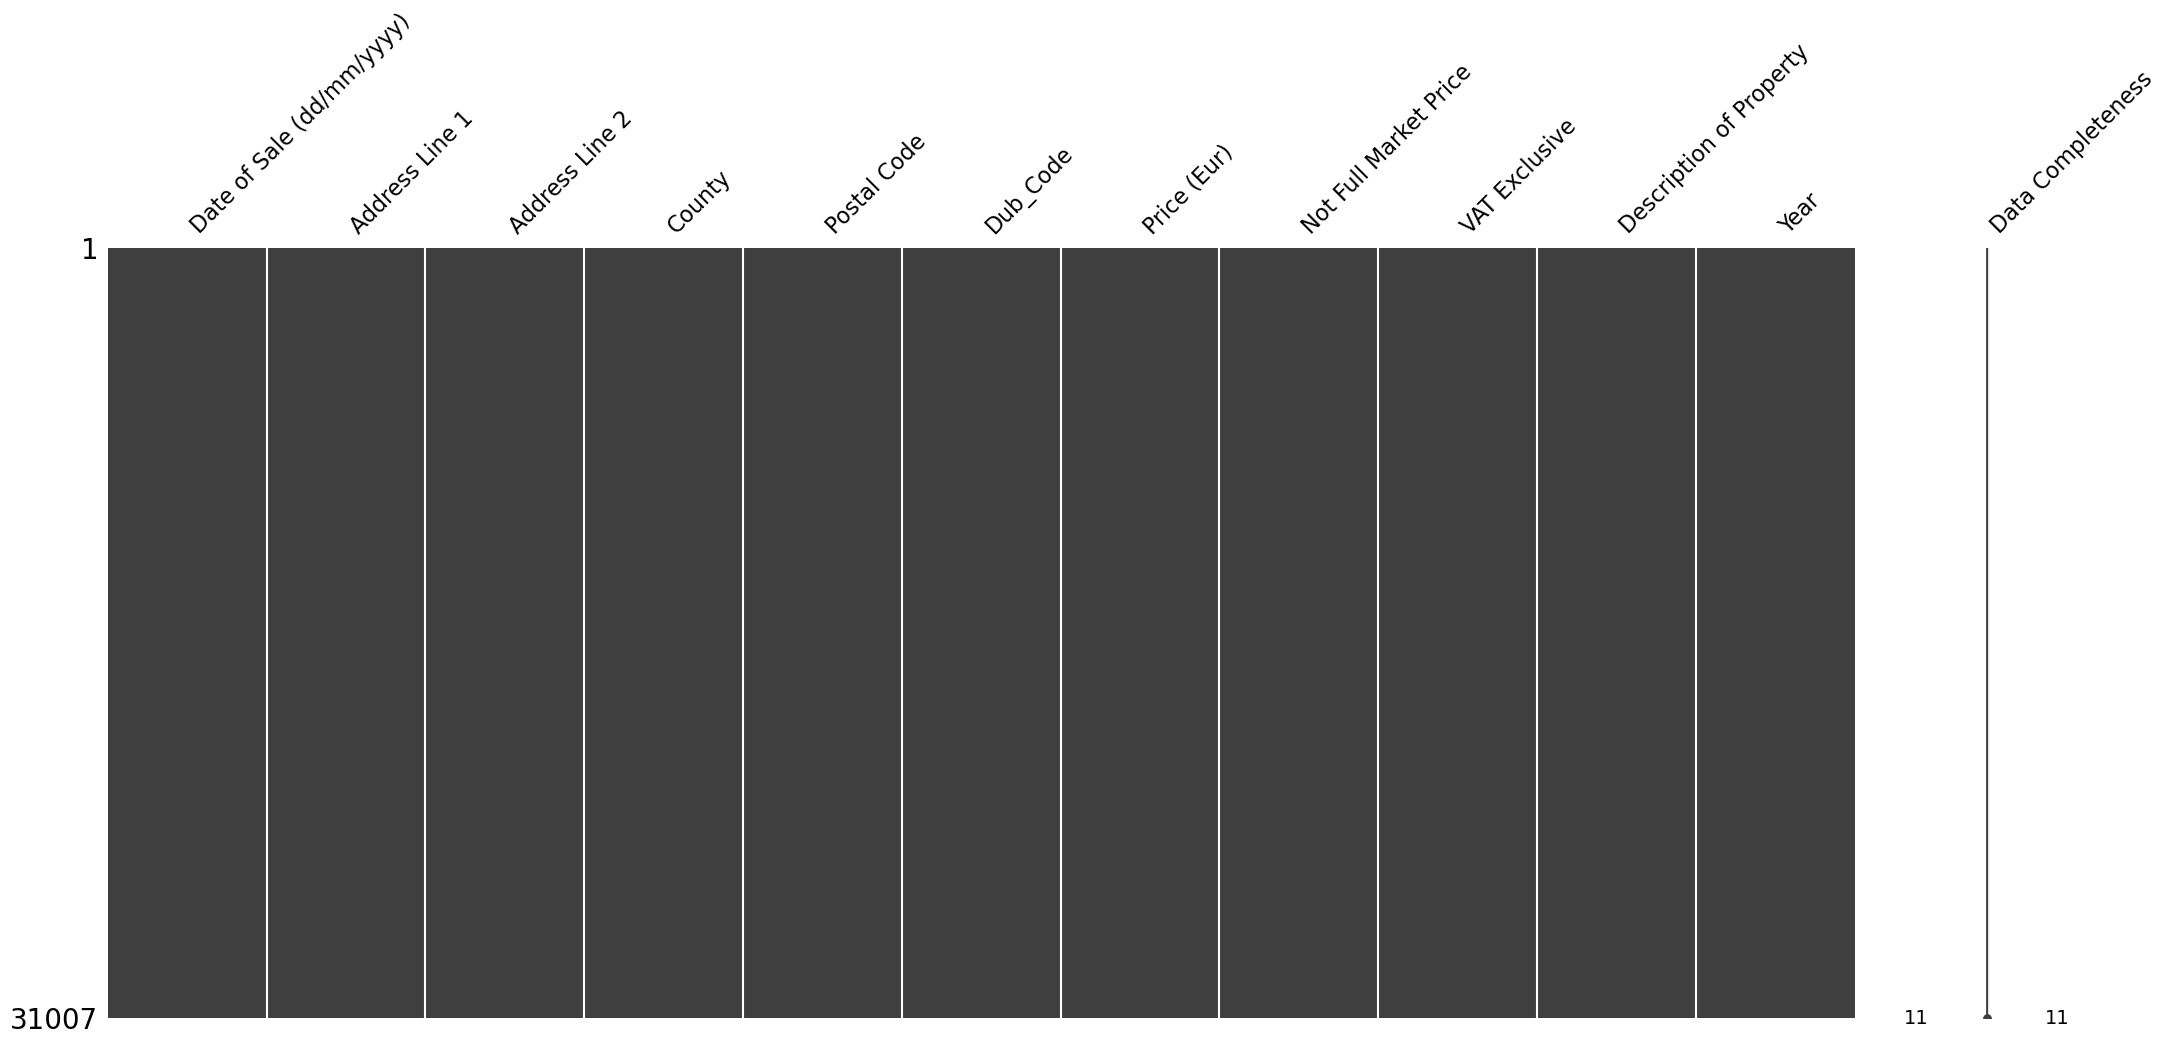

In [57]:
# Displays the completeness of the dataset and where the missing values are
msno.matrix(df, labels=True, sort="descending")

In [58]:
df['Postal Code'].unique()

array(['Dublin 1', 'Dublin 7', 'Dublin 12', 'Dublin 2', 'Dublin 16',
       'Dublin 8', 'Dublin 3', 'Dublin 13', 'Dublin 15', 'Dublin 5',
       'Dublin 17', 'Dublin 14', 'Dublin 9', 'Dublin 6', 'Dublin 4',
       'Dublin 18', 'Dublin 11', 'Dublin 24', 'Dublin 22', 'Dublin 10',
       'Dublin 20'], dtype=object)

In [59]:
# Displays only non-numerical data for the first 5 rows of the dataset 
df.select_dtypes(exclude="number").head()

,Date of Sale (dd/mm/yyyy),Address Line 1,Address Line 2,County,Postal Code,Not Full Market Price,VAT Exclusive,Description of Property
2,2011-04-01,Apartment 24 Baltrasna House,"Spencer Dock, North Wall Quay",Dublin,Dublin 1,No,No,Second-Hand Dwelling house /Apartment
3,2011-05-01,13 Linenhall Terrace,Broadstone,Dublin,Dublin 7,No,No,Second-Hand Dwelling house /Apartment
5,2011-05-01,282 Clonard Road,Crumlin,Dublin,Dublin 12,No,No,Second-Hand Dwelling house /Apartment
7,2011-05-01,73 St Jarlath Road,Cabra,Dublin,Dublin 7,No,No,Second-Hand Dwelling house /Apartment
10,2011-06-01,35 Trinity Square,Townsend Street,Dublin,Dublin 2,No,No,Second-Hand Dwelling house /Apartment


In [60]:
df.describe()

,Dub_Code,Price (Eur),Year
count,31007.000000,31007.000000,31007.000000
mean,11.971136,354137.236263,2017.170284
std,6.296362,171073.067807,2.048538
min,1.000000,100000.000000,2011.000000
25%,7.000000,235000.000000,2016.000000
50%,12.000000,314977.970000,2017.000000
75%,16.000000,430000.000000,2019.000000
max,24.000000,1000000.000000,2020.000000


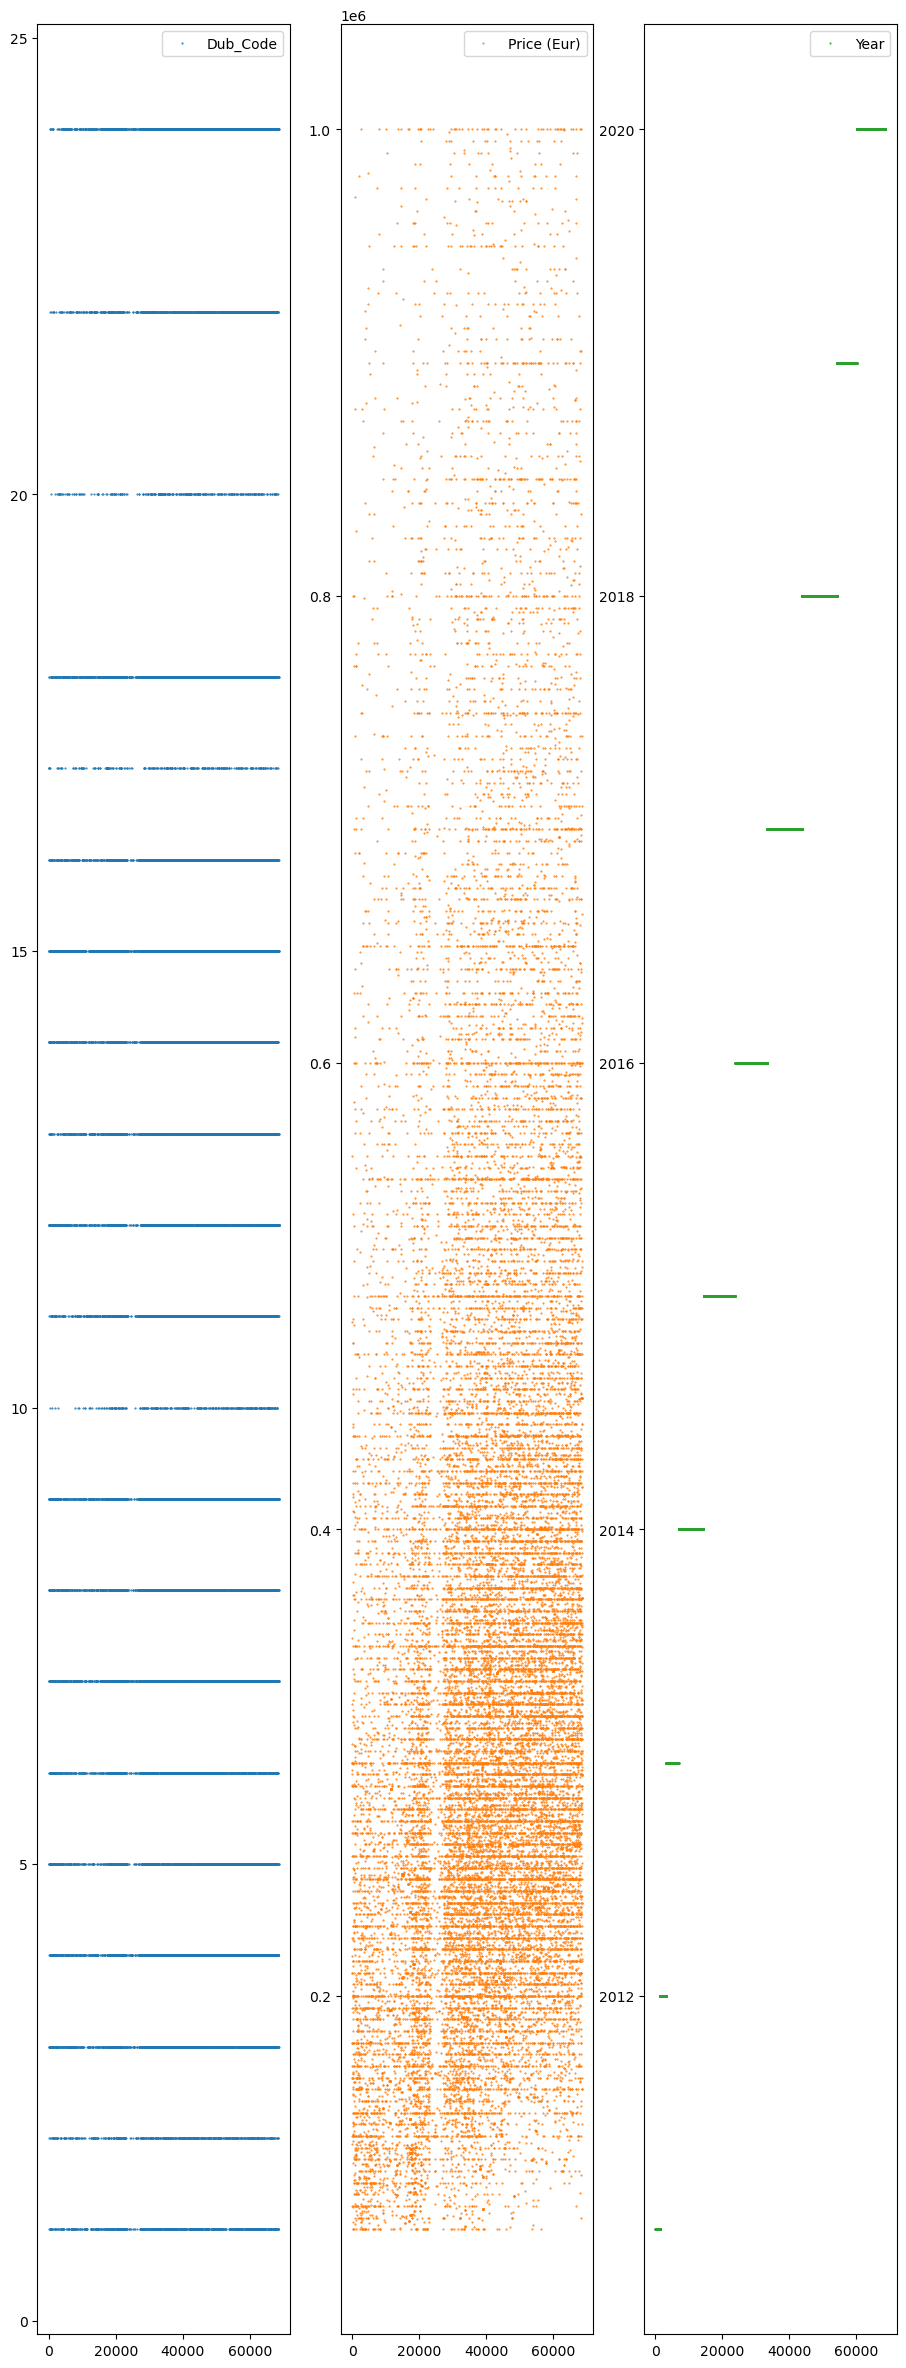

In [61]:
# Displays a global view of the dataset for only numerical features
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

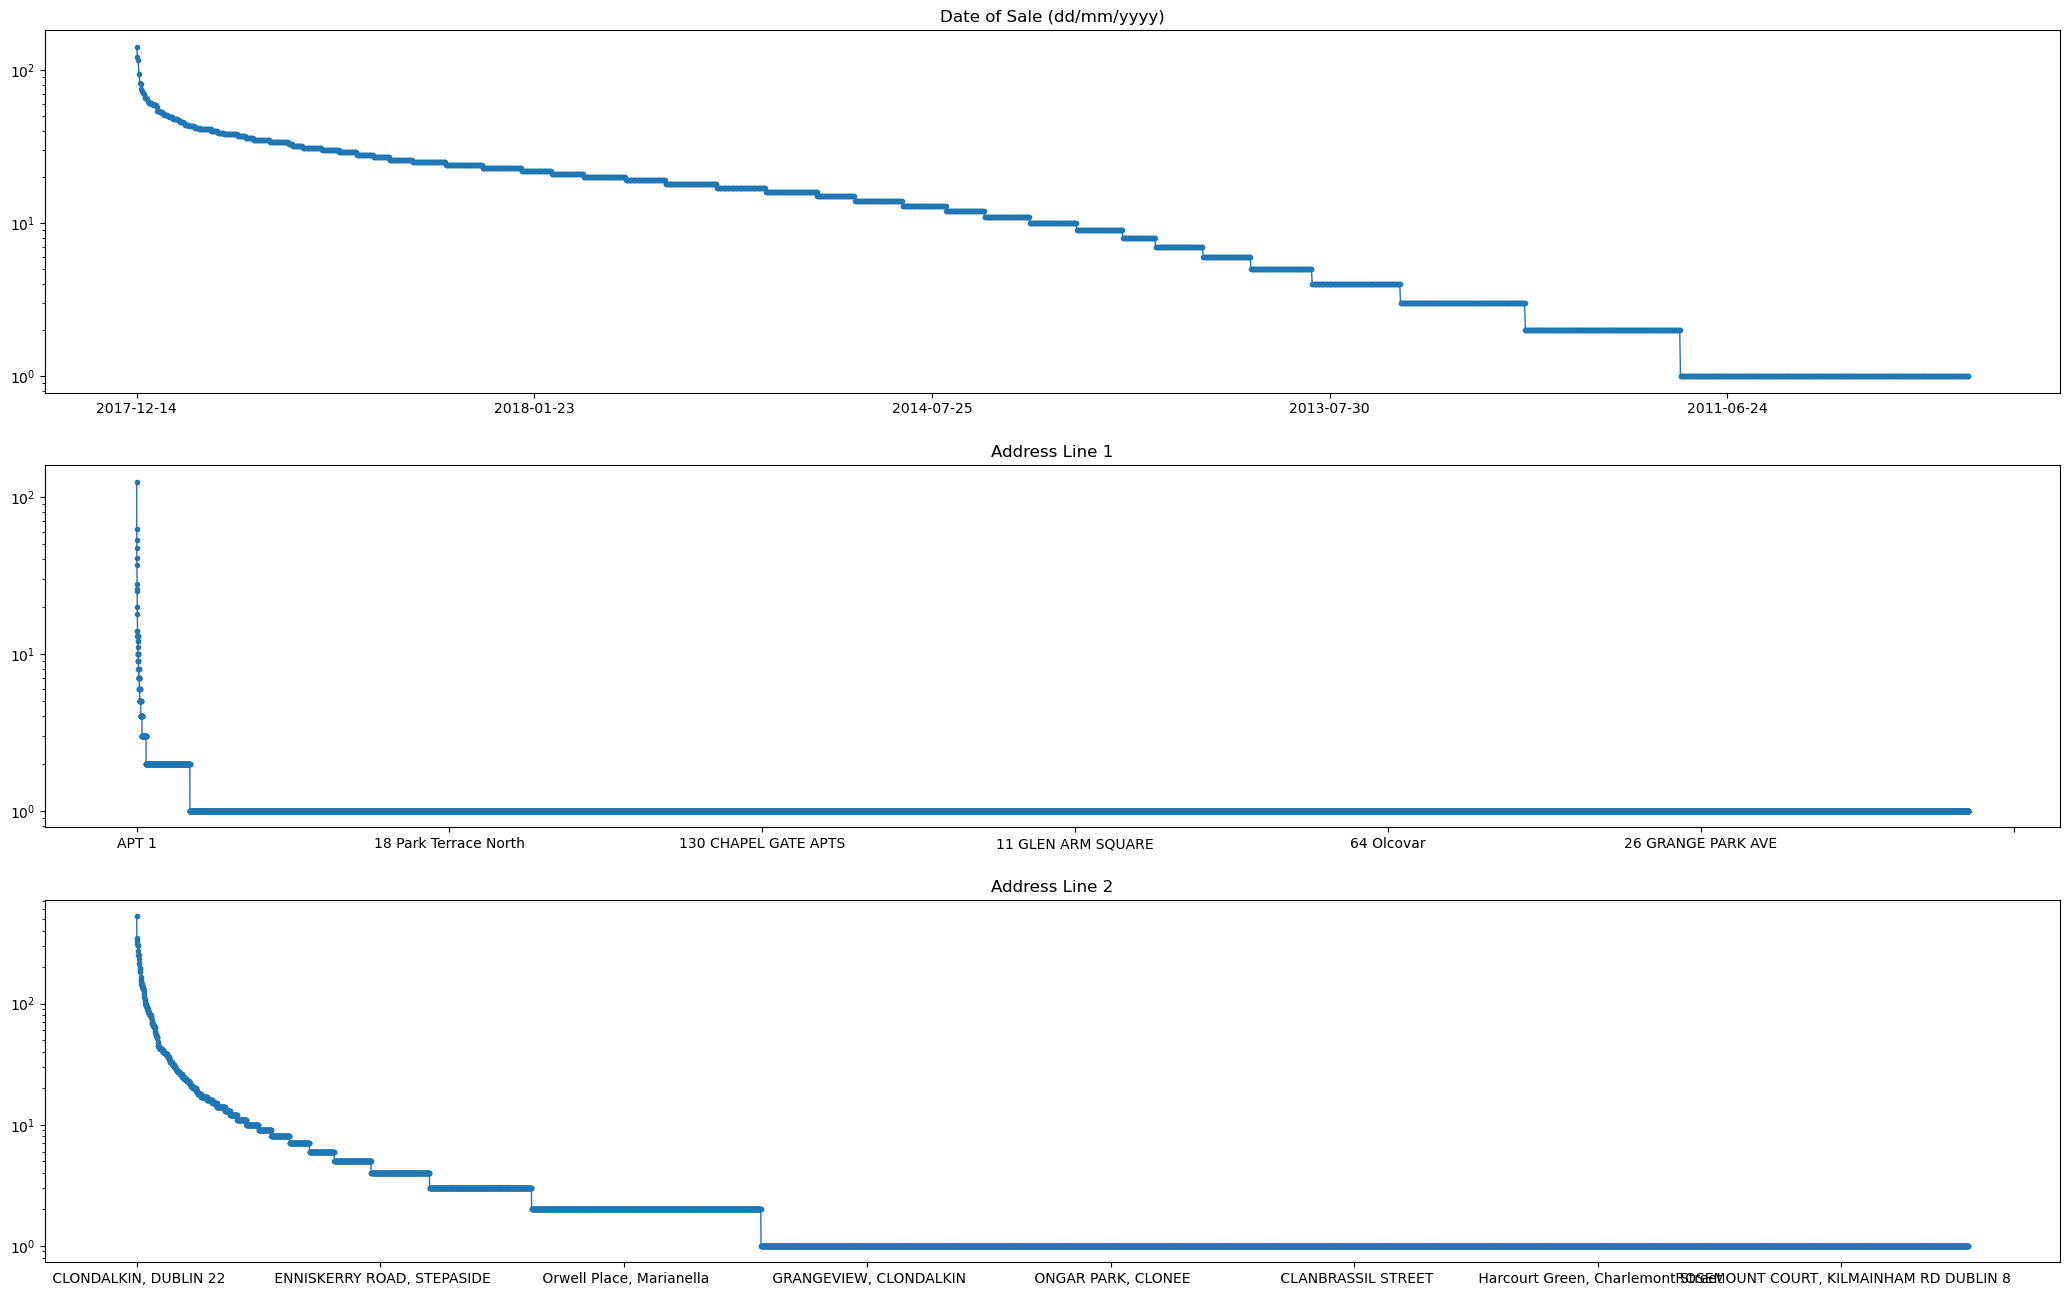

In [62]:
# Displays a global view of the dataset for non numerical features by excluding the numerical entries
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(26, 16))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=1, marker=".", ax=ax)
    
plt.show();

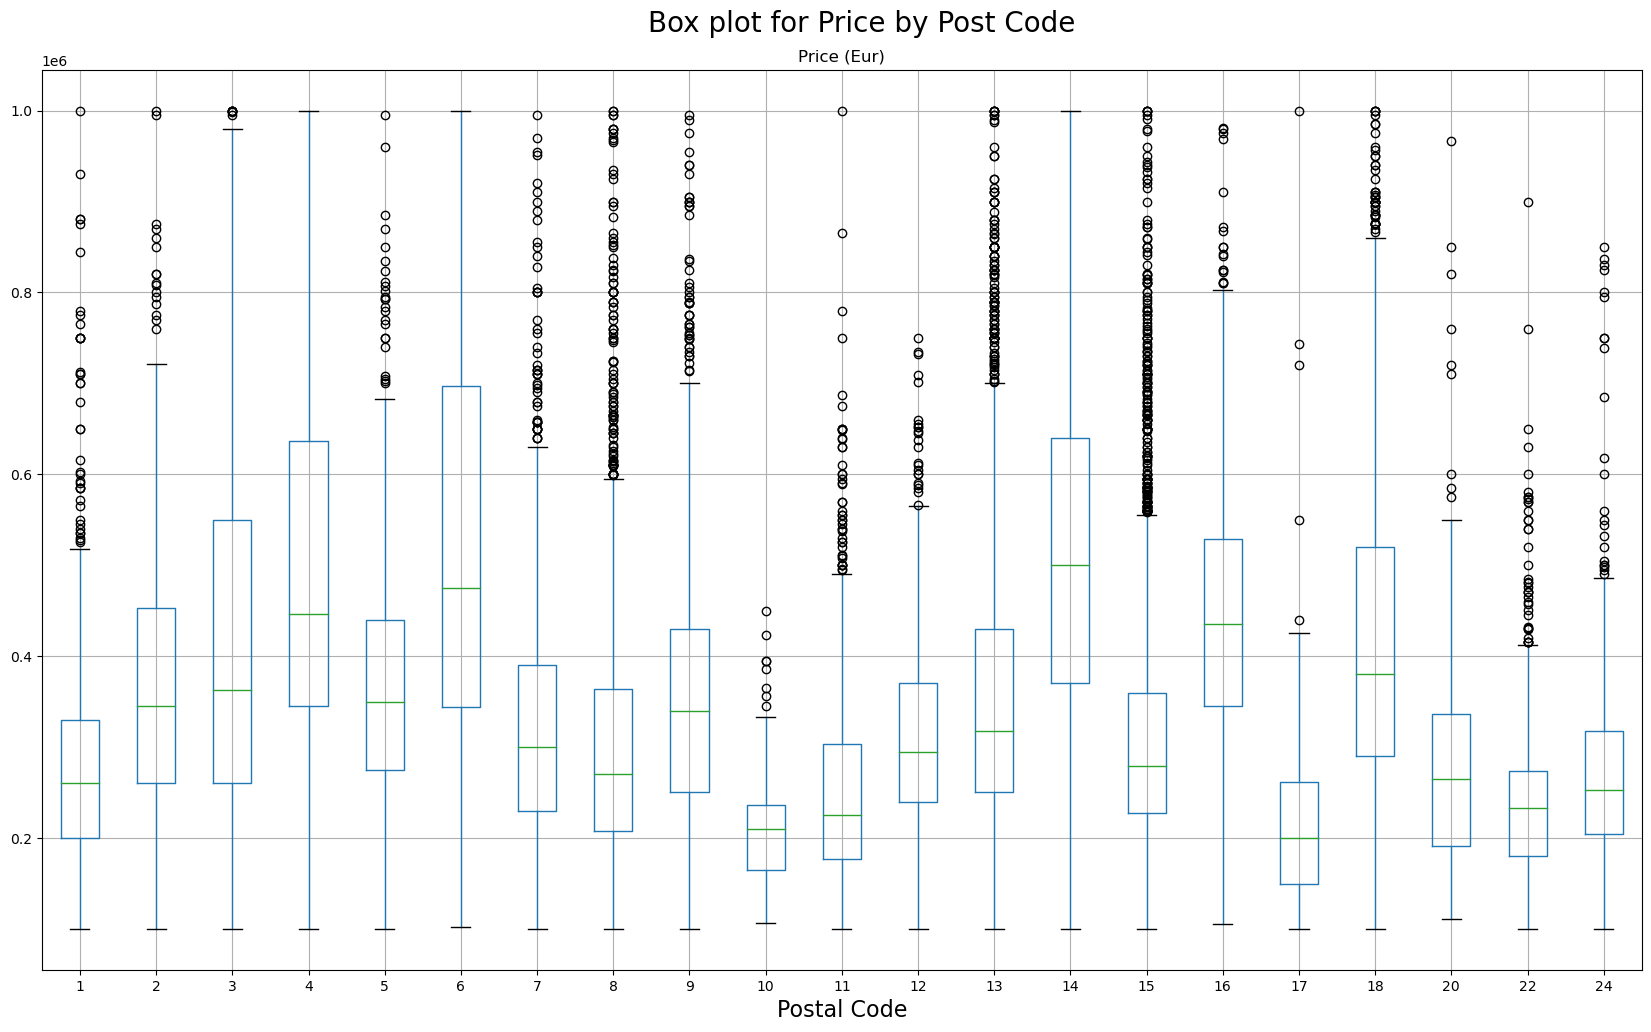

In [63]:
# Creates a boxplot to show an Element based on Item and Value
df.boxplot(column =['Price (Eur)'], by = ['Dub_Code'], figsize =(20,12))

plt.suptitle("Box plot for Price by Post Code", fontsize=20, color="Black", x=0.51, y=0.95)
plt.xlabel("Postal Code", fontsize=16)

plt.show()

In [64]:
# Calculate the IQR of the 'Price (Eur)' column
q1 = df['Price (Eur)'].quantile(0.25)
q3 = df['Price (Eur)'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper limits for outliers
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Remove outliers from the 'Price (Eur)' column
df = df[(df['Price (Eur)'] >= lower_limit) & (data['Price (Eur)'] <= upper_limit)]

# Save the modified DataFrame to a new CSV file
df.to_csv('outliers_removed.csv', index=False)

df2 = pd.read_csv('outliers_removed.csv')
df2.head()

,Date of Sale (dd/mm/yyyy),Address Line 1,Address Line 2,County,Postal Code,Dub_Code,Price (Eur),Not Full Market Price,VAT Exclusive,Description of Property,Year
0,2011-04-01,Apartment 24 Baltrasna House,"Spencer Dock, North Wall Quay",Dublin,Dublin 1,1,290500.0,No,No,Second-Hand Dwelling house /Apartment,2011
1,2011-05-01,13 Linenhall Terrace,Broadstone,Dublin,Dublin 7,7,290000.0,No,No,Second-Hand Dwelling house /Apartment,2011
2,2011-05-01,282 Clonard Road,Crumlin,Dublin,Dublin 12,12,170000.0,No,No,Second-Hand Dwelling house /Apartment,2011
3,2011-05-01,73 St Jarlath Road,Cabra,Dublin,Dublin 7,7,225000.0,No,No,Second-Hand Dwelling house /Apartment,2011
4,2011-06-01,35 Trinity Square,Townsend Street,Dublin,Dublin 2,2,180000.0,No,No,Second-Hand Dwelling house /Apartment,2011


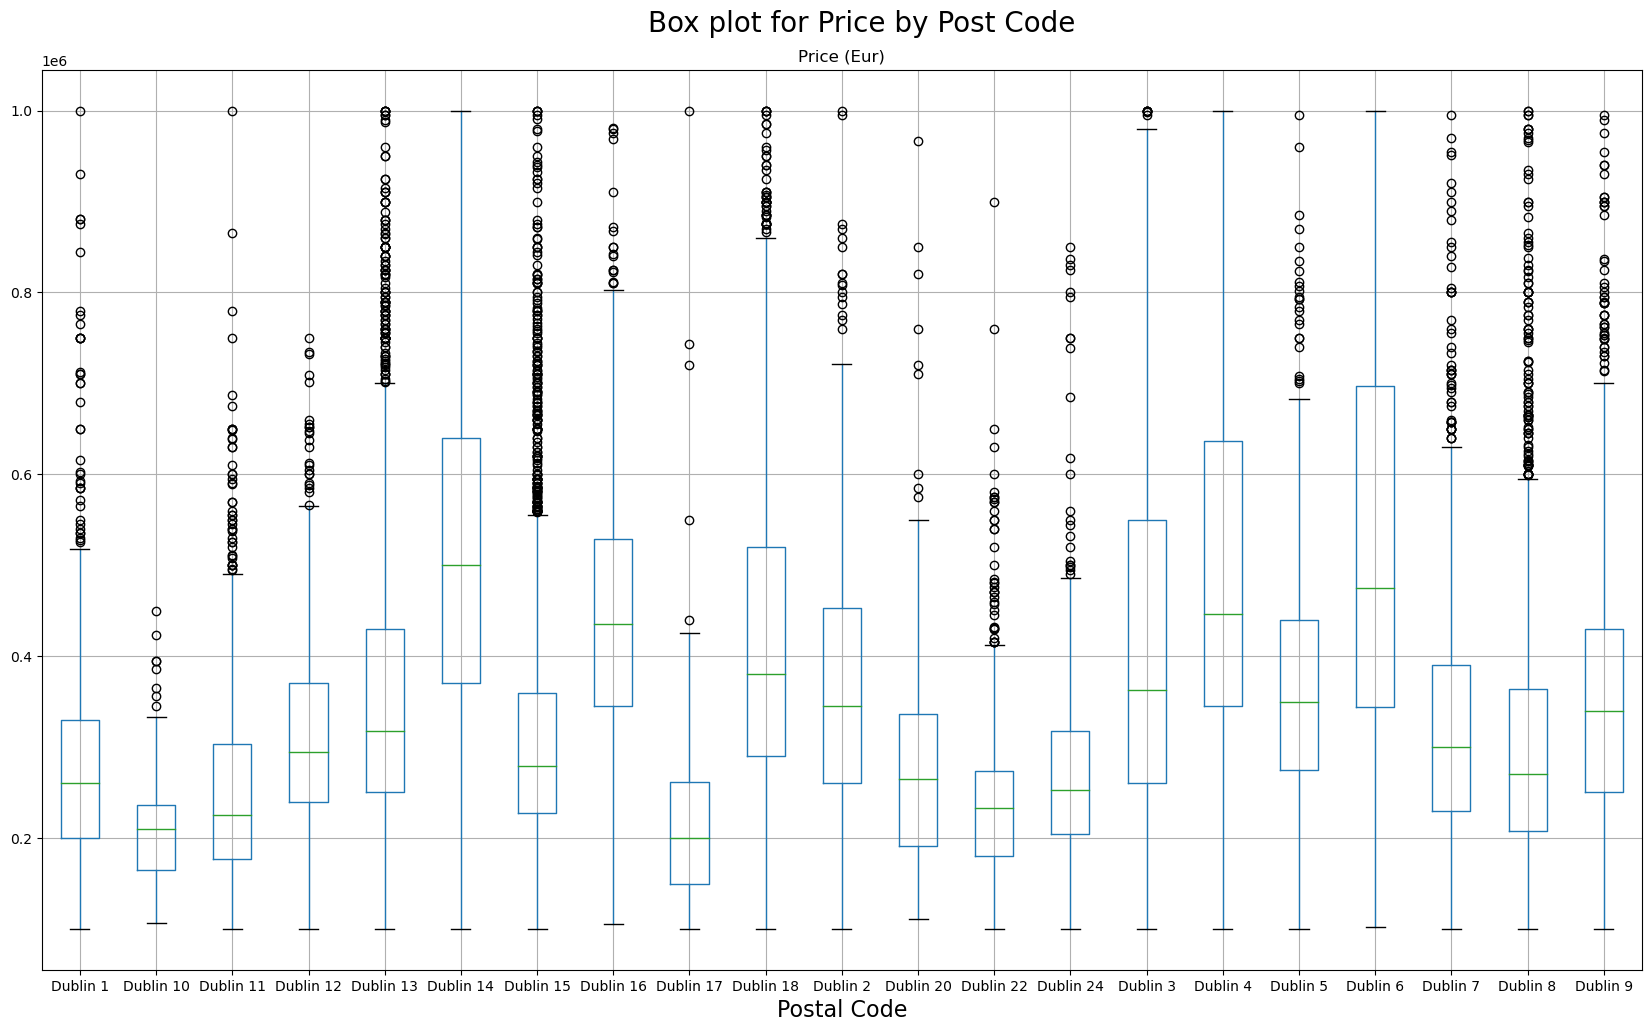

In [44]:
# Creates a boxplot to show an Element based on Item and Value
df2.boxplot(column =['Price (Eur)'], by = ['Postal Code'], figsize =(20,12))

plt.suptitle("Box plot for Price by Post Code", fontsize=20, color="Black", x=0.51, y=0.95)
plt.xlabel("Postal Code", fontsize=16)

plt.show()

In [65]:
df2.describe()

,Dub_Code,Price (Eur),Year
count,31007.000000,31007.000000,31007.000000
mean,11.971136,354137.236263,2017.170284
std,6.296362,171073.067807,2.048538
min,1.000000,100000.000000,2011.000000
25%,7.000000,235000.000000,2016.000000
50%,12.000000,314977.970000,2017.000000
75%,16.000000,430000.000000,2019.000000
max,24.000000,1000000.000000,2020.000000


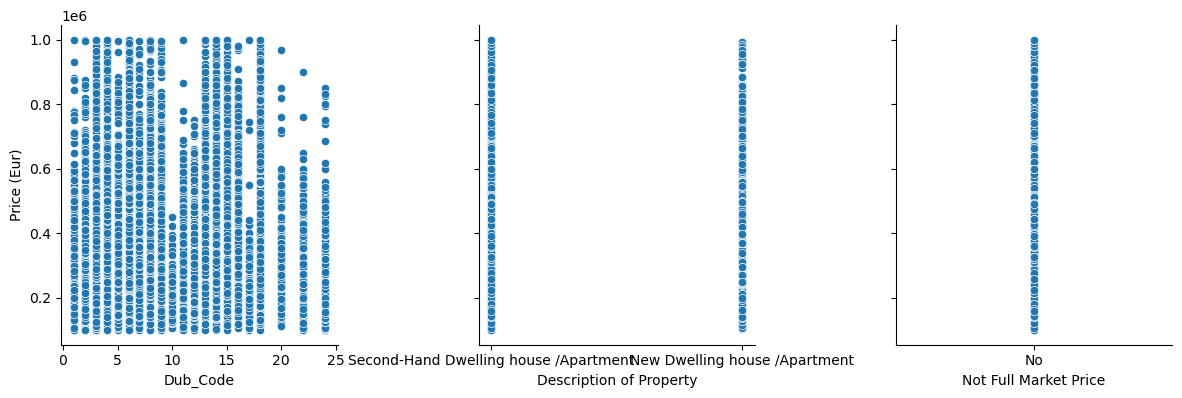

In [67]:
sns.pairplot(df2, x_vars=['Dub_Code', 'Description of Property', 'Not Full Market Price'], y_vars='Price (Eur)', height=4, aspect=1, kind='scatter')
plt.show()

array([[<AxesSubplot:xlabel='Dub_Code'>],
       [<AxesSubplot:xlabel='Dub_Code'>],
       [<AxesSubplot:xlabel='Dub_Code'>],
       [<AxesSubplot:xlabel='Dub_Code'>],
       [<AxesSubplot:xlabel='Dub_Code'>],
       [<AxesSubplot:xlabel='Dub_Code'>],
       [<AxesSubplot:xlabel='Dub_Code'>],
       [<AxesSubplot:xlabel='Dub_Code'>]], dtype=object)

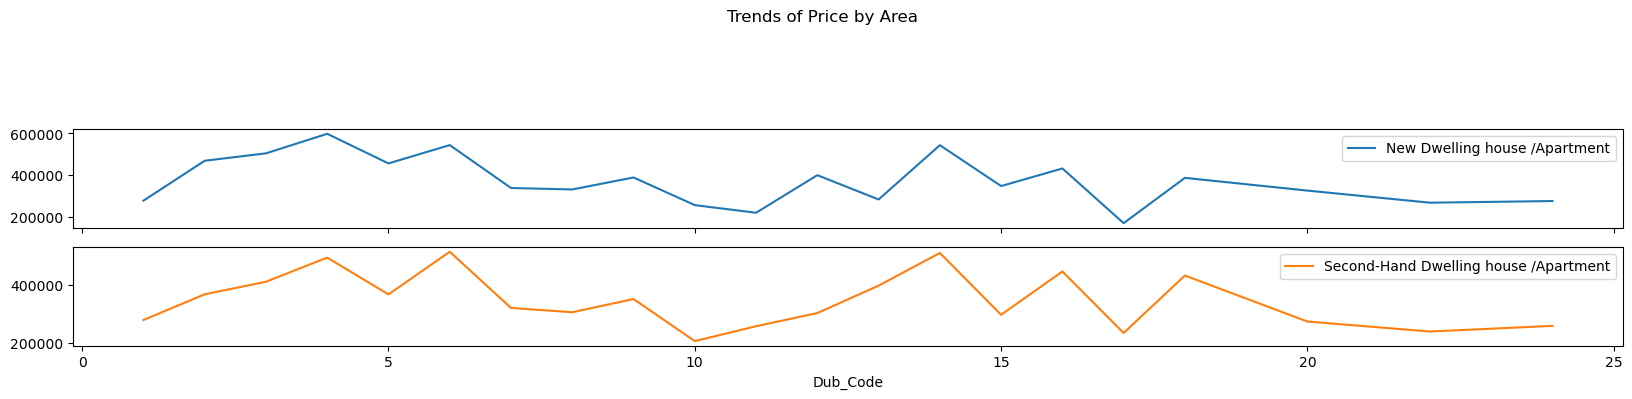

In [68]:
pd.pivot_table(df2.reset_index(),
               index='Dub_Code', columns='Description of Property', values='Price (Eur)'
              ).plot(subplots=True, layout=(8,1), figsize =(20,12), title=('Trends of Price by Area'))

<AxesSubplot:xlabel='Dub_Code', ylabel='Price (Eur)'>

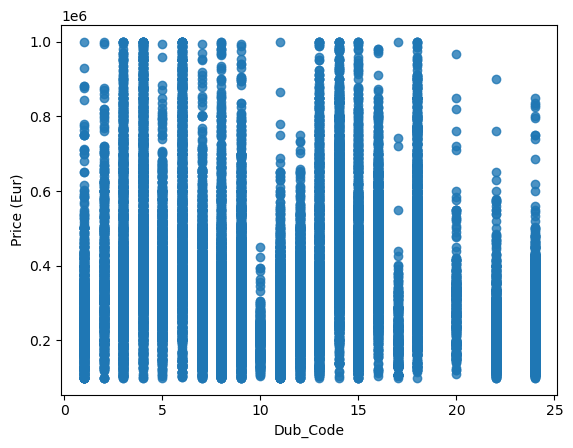

In [72]:
# visualise area-price relationship
sns.regplot(x="Dub_Code", y="Price (Eur)", data=df2, fit_reg=False)

# Statistics elements


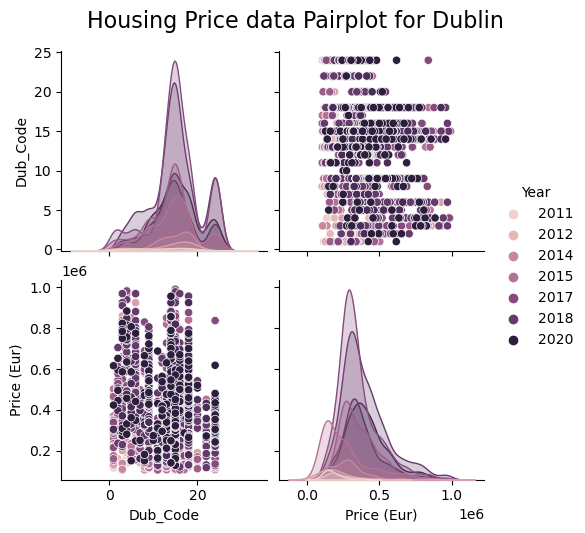

In [84]:
# I am using Pairplot here to further identify any additonal correlations in the data for Ireland

ax_ptrans = sns.pairplot(df2.loc[df2['Description of Property'] == 'New Dwelling house /Apartment'], hue='Year')

plt.suptitle("Housing Price data Pairplot for Dublin", fontsize=16, color="black", x=0.51, y=1.05)

plt.show()

In [76]:
# Extract the relevant data from your dataset
# data = df2# your dataset
factor = 'Year' # the factor you want to test (e.g. Dublin neighborhoods)

# Perform the one-way ANOVA test
f_stat, p_value = stats.f_oneway(*[group['Price (Eur)'] for name, group in df2.groupby(factor)])

# Print the results
print(f"Factor: {factor}")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

Factor: Year
F-statistic: 120.54986679279732
P-value: 7.782457472780755e-224


# Machine Learning Aspect

In [ ]:
len(df2.index)

In [ ]:
# filter only area and price
df3 = df2.loc[:, ['Dub_Code', 'Price (Eur)']]
df3.head()

In [ ]:
# recaling the variables (both)
df_columns = df3.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df3)

# rename columns (since now its an np array)
df3 = pd.DataFrame(df3)
df3.columns = df_columns

df3.head()

In [ ]:
# visualise area-price relationship
sns.regplot(x="Dub_Code", y="Price (Eur)", data=df3, fit_reg=False)

In [ ]:
# split into train and test
df_train, df_test = train_test_split(df3, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

In [ ]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train['Dub_Code']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['Price (Eur)']

X_test = df_test['Dub_Code']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['Price (Eur)']

In [ ]:
len(X_train)

In [ ]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 8, 10]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))